### 2) Country Selection (S7, S10, C1, C3)

**Import Libraries**

In [1]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

#### 2.1) Function Definition to check Level, Trend and Seasonality (S7, S10)

**To be able to decompose time series into trend, seasonality and residual plots:**

I will first create a function that plots all and calculates the result of hypothesis testing about being stationary

In [2]:
def ts_decompose(y, model="additive", stationary=False):
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show()

    if stationary:
        print("HO: Not Stationary.")
        print("H1: Stationary.")
        p_value = sm.tsa.stattools.adfuller(y)[1]
        if p_value < 0.05:
            print(F"Result: Series is Stationary ({p_value}).")
        else:
            print(F"Result: Series is not Stationary ({p_value}).")

#### 2.2) Stationary check and selecting countries (C1, C3)

Now I will test all these 8 countries, and continue with non-stationary ones since my intention was to forecast it.

##### Production check

In [3]:
prod = pd.read_excel('C:/Users/ismai/Desktop/electricity_forecast/electricity_data/production/production.xlsx')
prod = prod.set_index('year_month')

**AUSTRIA**

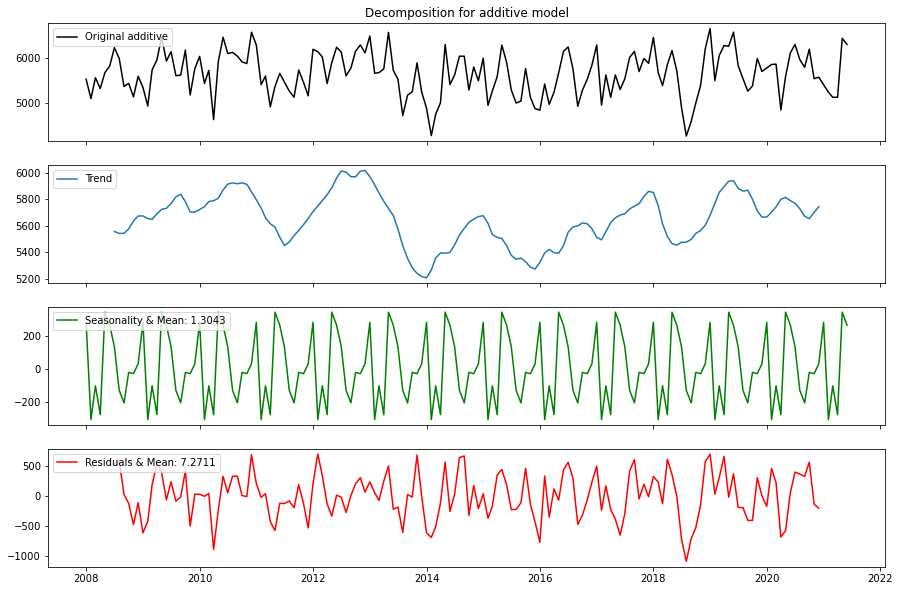

HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (8.448645808429184e-12).


HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (8.448645808429184e-12).


In [4]:
y = prod['Austria']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE REFUSE AUSTRIA SINCE IT'S STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**CROATIA**

In [5]:
y = prod['Croatia']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (0.011766500189801491).


HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (0.011766500189801491).


*WE REFUSE CROATIA SINCE IT'S STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**DENMARK**

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.6852280503743171).


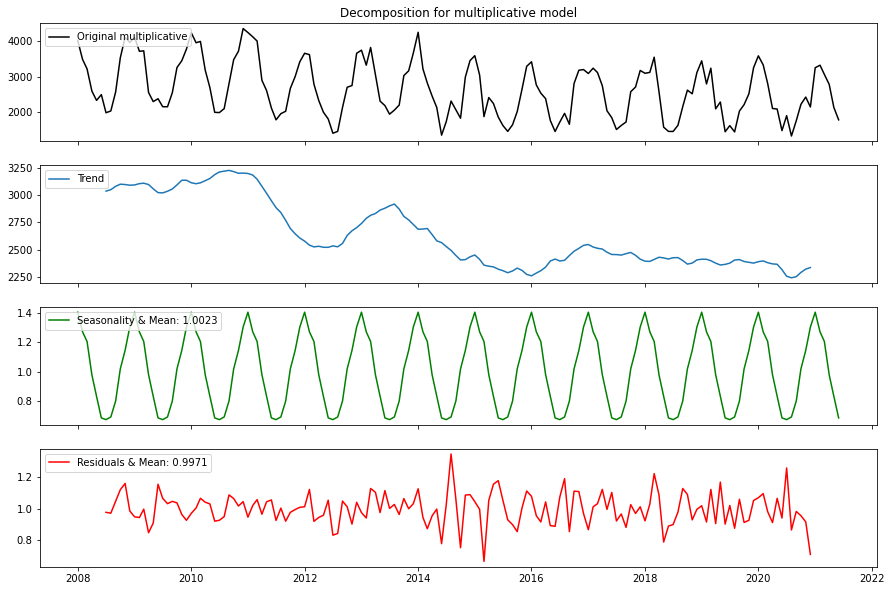

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.6852280503743171).


In [6]:
y = prod['Denmark']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT DENMARK SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**GREECE**

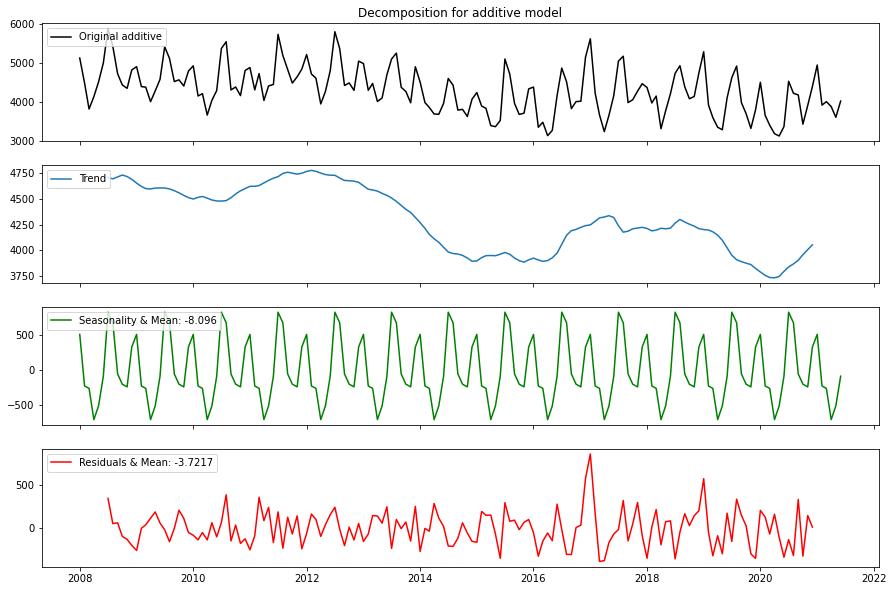

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.531774483380085).


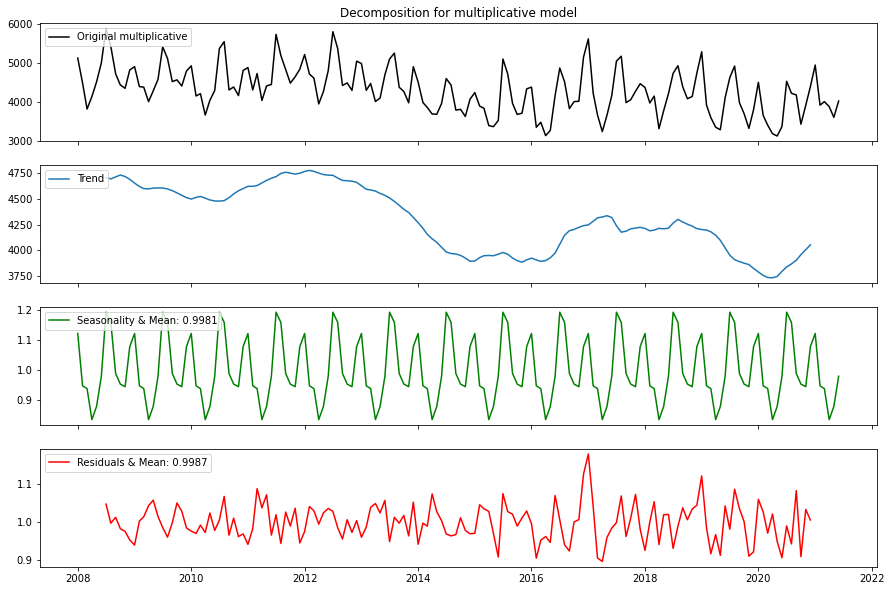

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.531774483380085).


In [7]:
y = prod['Greece']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT GREECE SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**IRELAND**

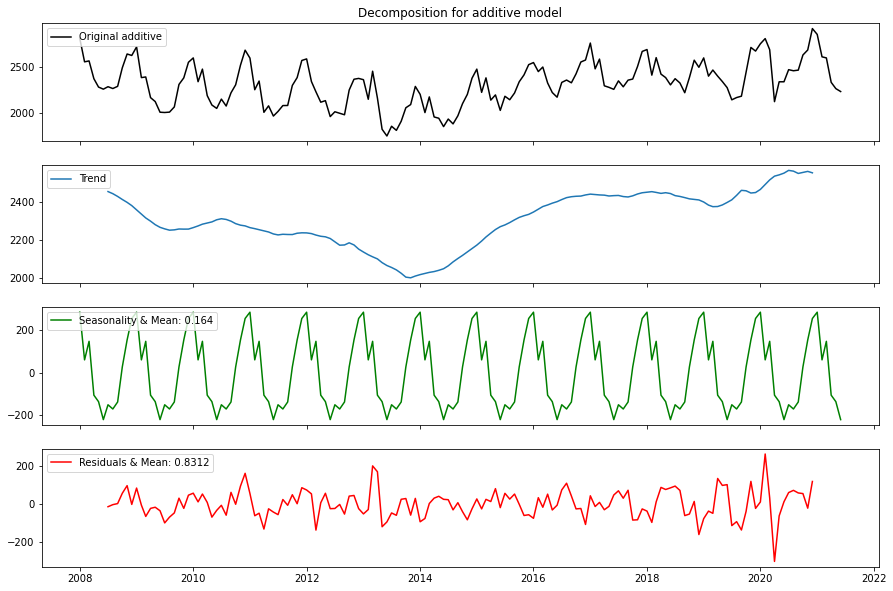

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.6341960771919364).


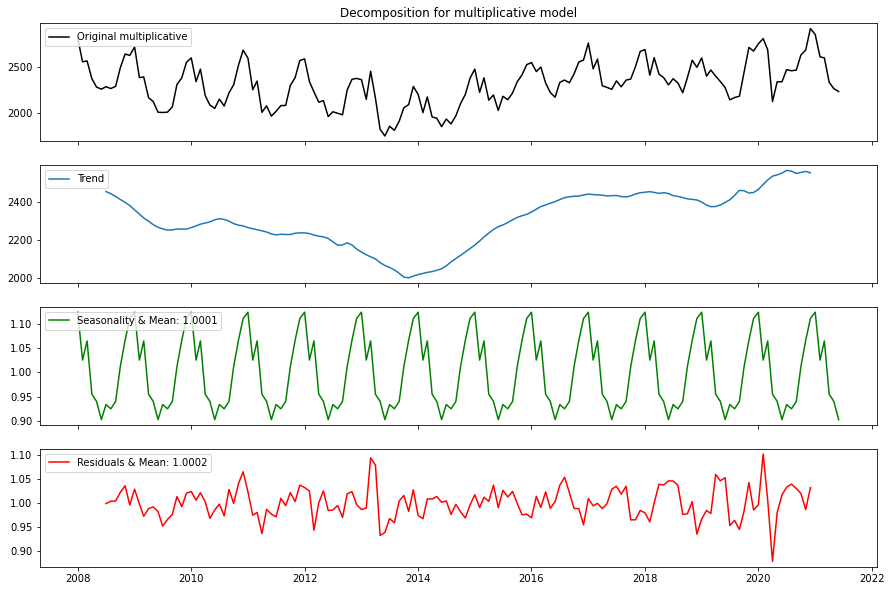

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.6341960771919364).


In [8]:
y = prod['Ireland']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT IRELAND SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**LATVIA**

In [9]:
y = prod['Latvia']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (0.02938645457257418).


HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (0.02938645457257418).


*WE REFUSE LATVIA SINCE IT'S STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SPAIN**

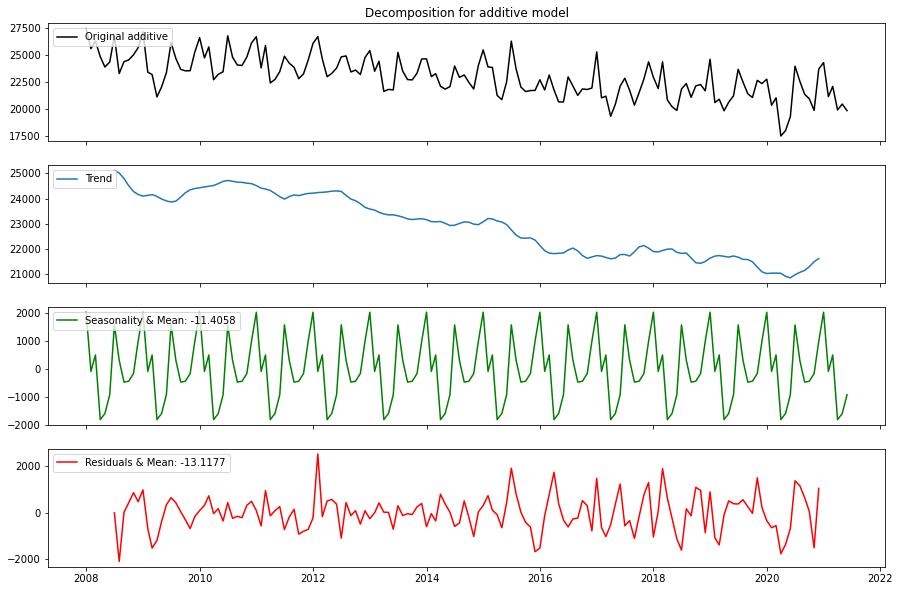

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.633223593377078).


HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.633223593377078).


In [10]:
y = prod['Spain']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SPAIN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SWEDEN**

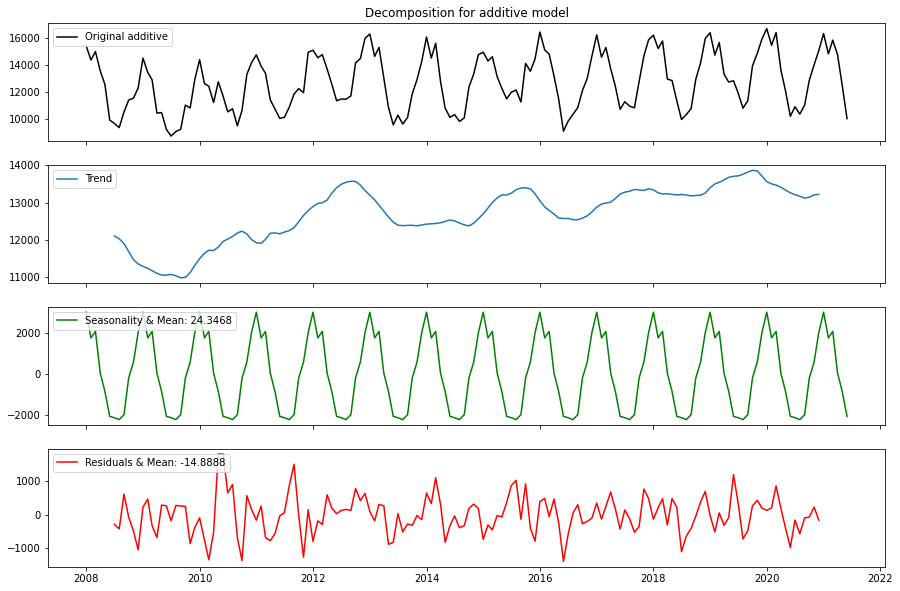

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.3756942100023406).


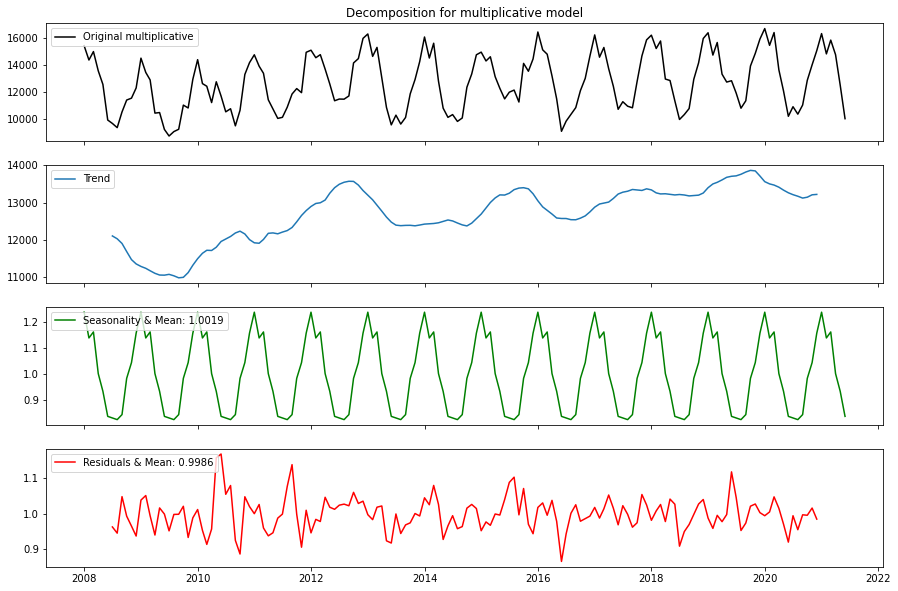

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.3756942100023406).


In [11]:
y = prod['Sweden']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SWEDEN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**Chosen countries for further check: Denmark, Greece, Ireland, Spain, Sweden**

##### Consumption check 

In [12]:
cons = pd.read_excel('C:/Users/ismai/Desktop/electricity_forecast/electricity_data/consumption/consumption.xlsx')
cons = cons.set_index('year_month')

**DENMARK**

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.4453823785891266).


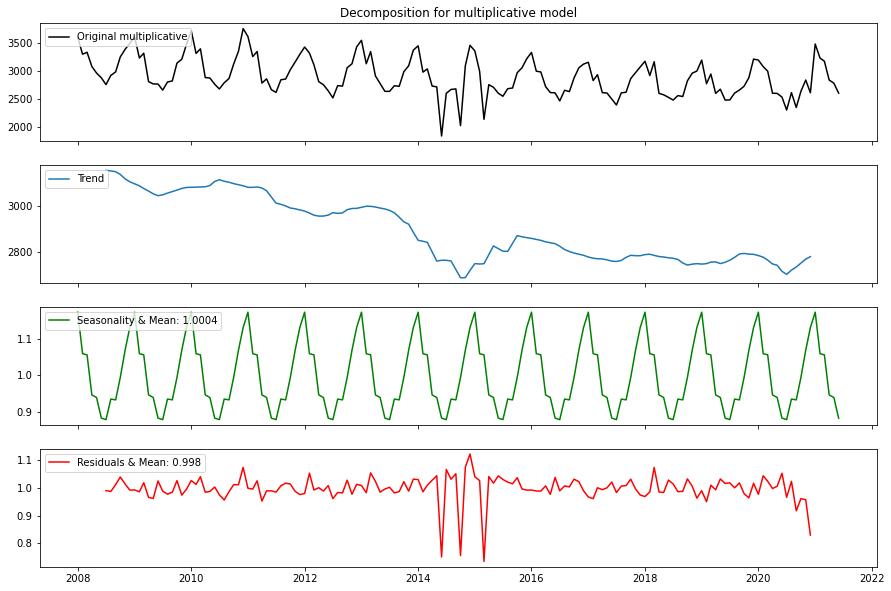

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.4453823785891266).


In [13]:
y = cons['Denmark']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT DENMARK SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**GREECE**

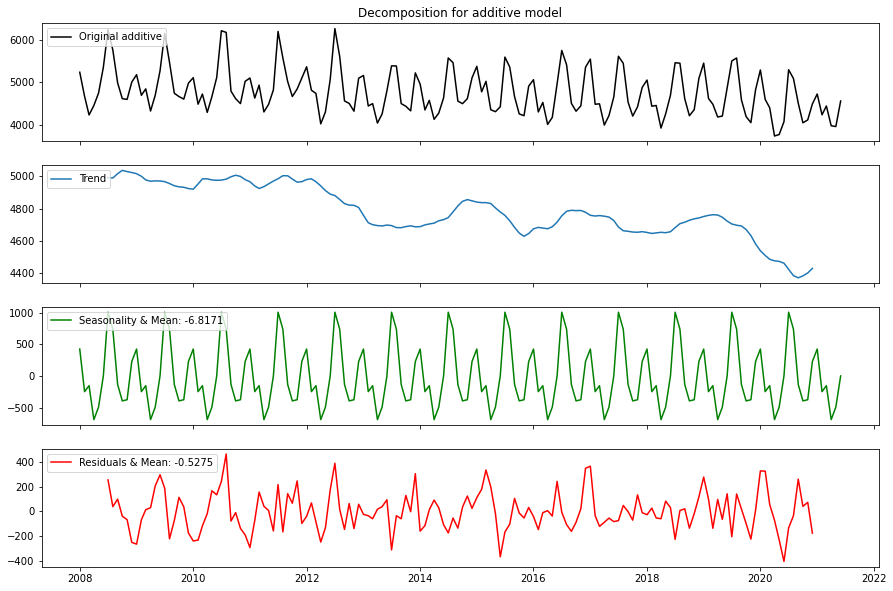

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.7678174440144895).


HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.7678174440144895).


In [14]:
y = cons['Greece']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT GREECE SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**IRELAND**

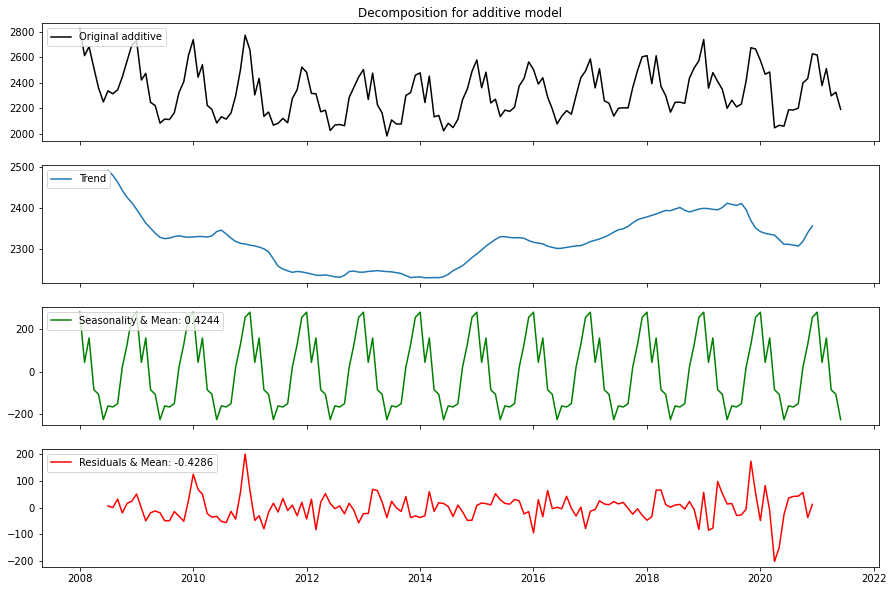

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.2480041579826066).


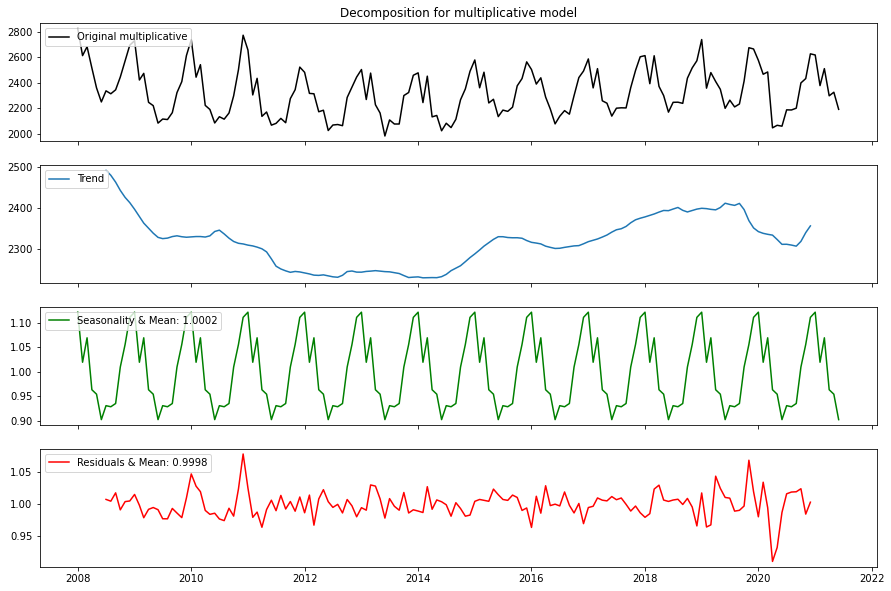

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.2480041579826066).


In [15]:
y = cons['Ireland']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT IRELAND SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SPAIN**

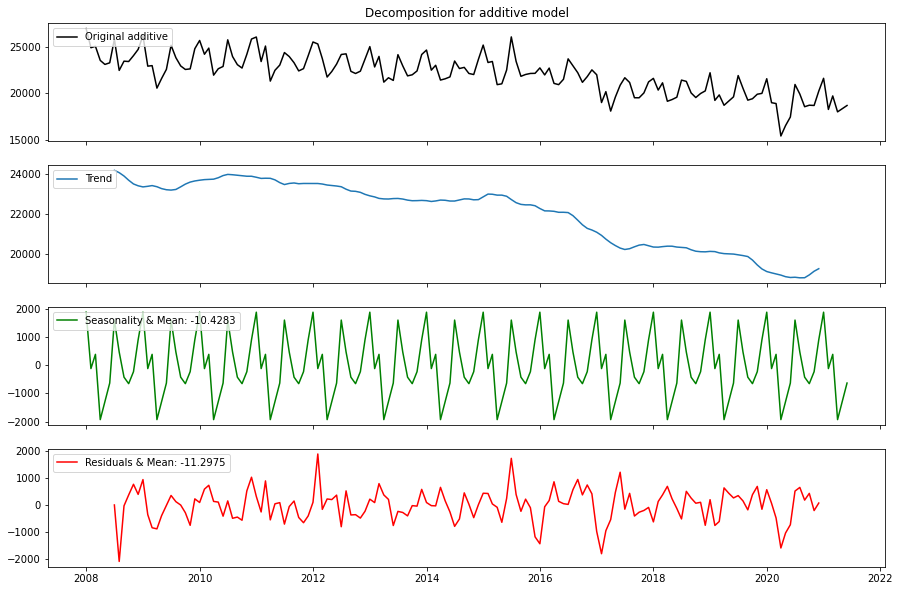

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.9271764698250036).


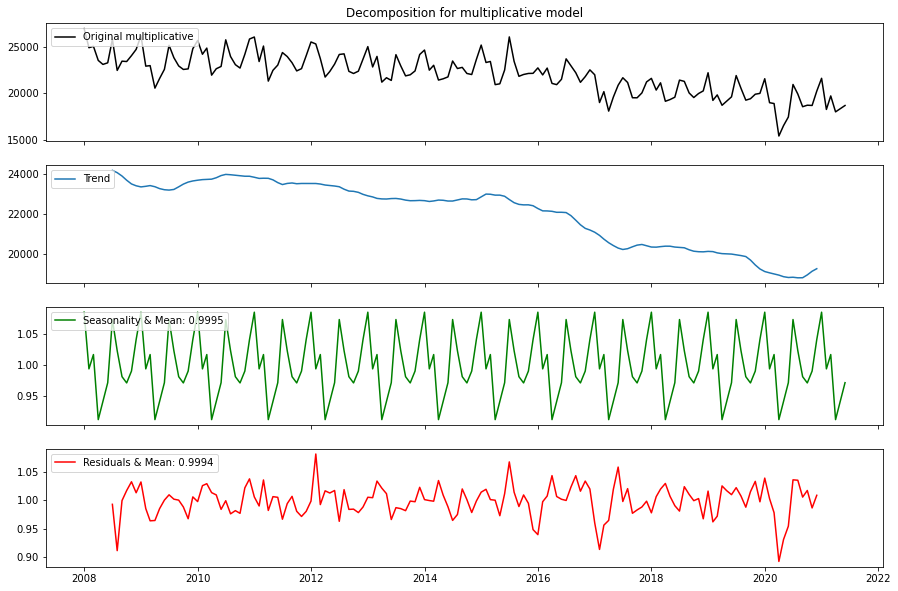

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.9271764698250036).


In [16]:
y = cons['Spain']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SPAIN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SWEDEN**

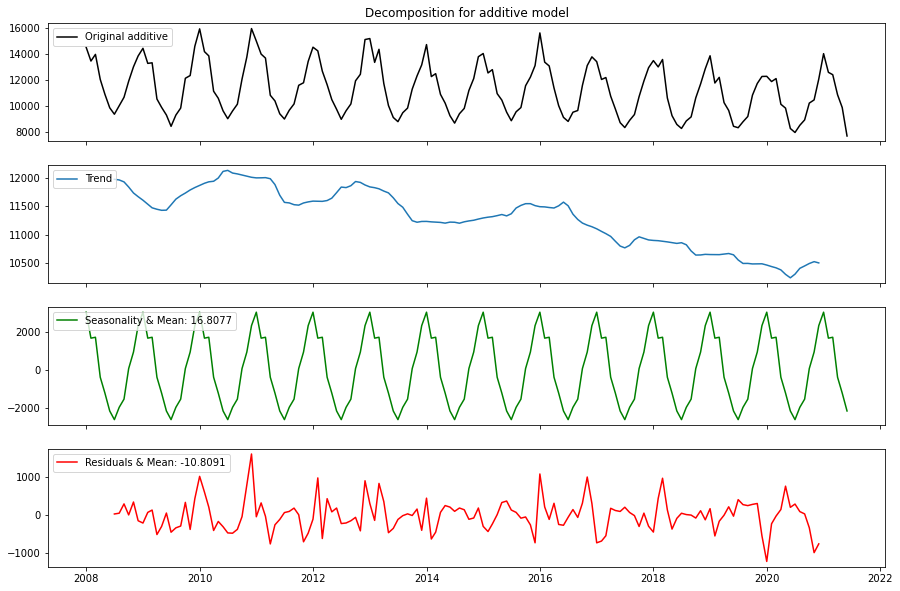

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.886663310616126).


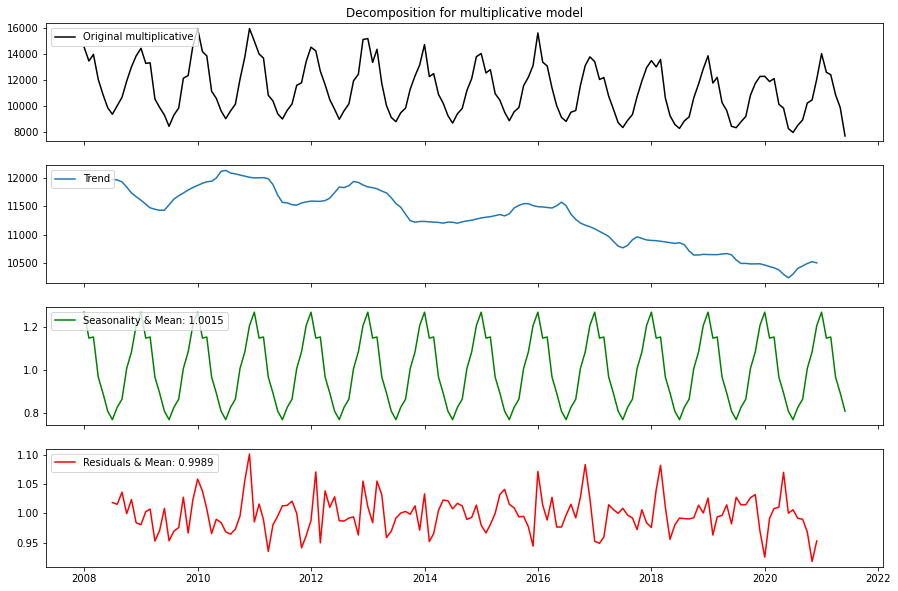

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.886663310616126).


In [17]:
y = cons['Sweden']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SWEDEN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**Chosen countries for further check: Denmark, Greece, Ireland, Spain, Sweden**

##### Import check

In [18]:
im = pd.read_excel('C:/Users/ismai/Desktop/electricity_forecast/electricity_data/import/imp.xlsx')
im = im.set_index('year_month')

**DENMARK**

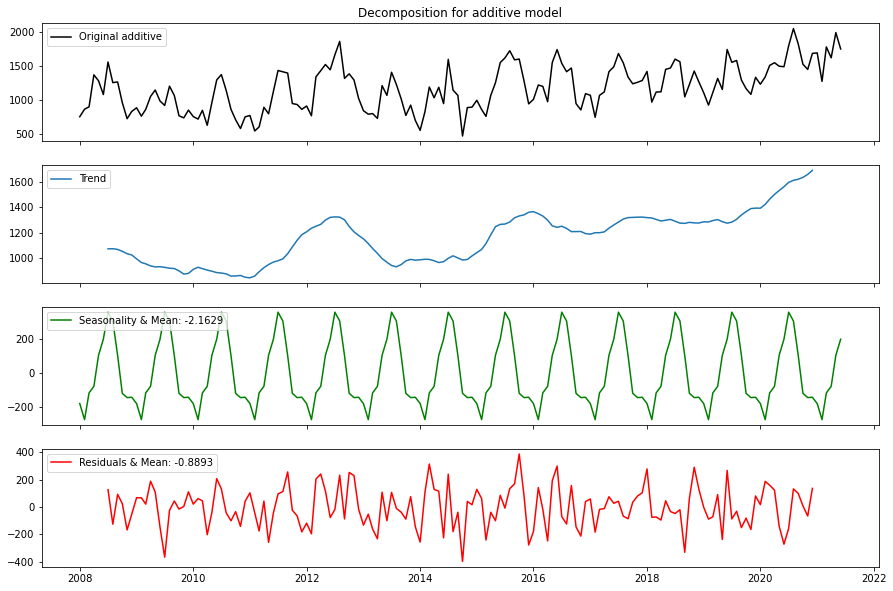

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.8019112812018272).


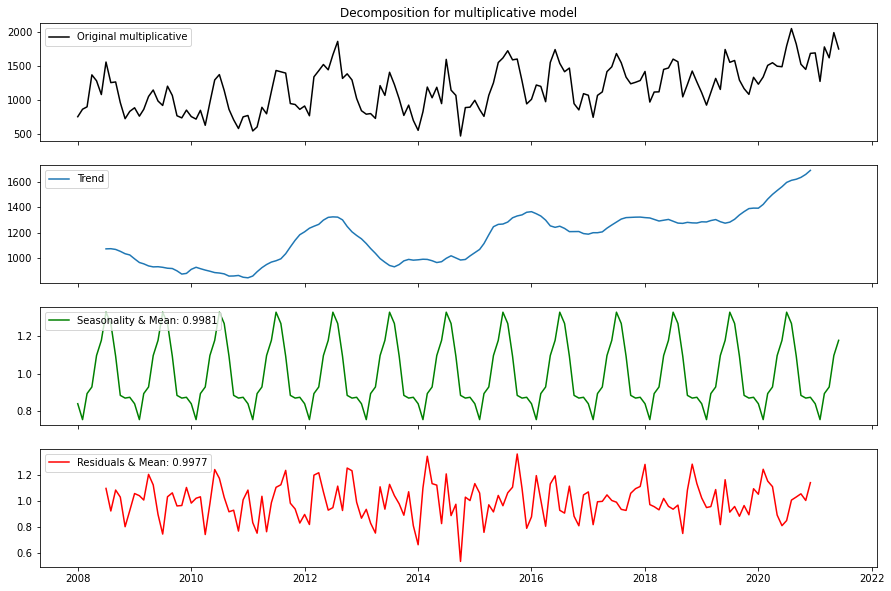

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.8019112812018272).


In [19]:
y = im['Denmark']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT DENMARK SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**GREECE**

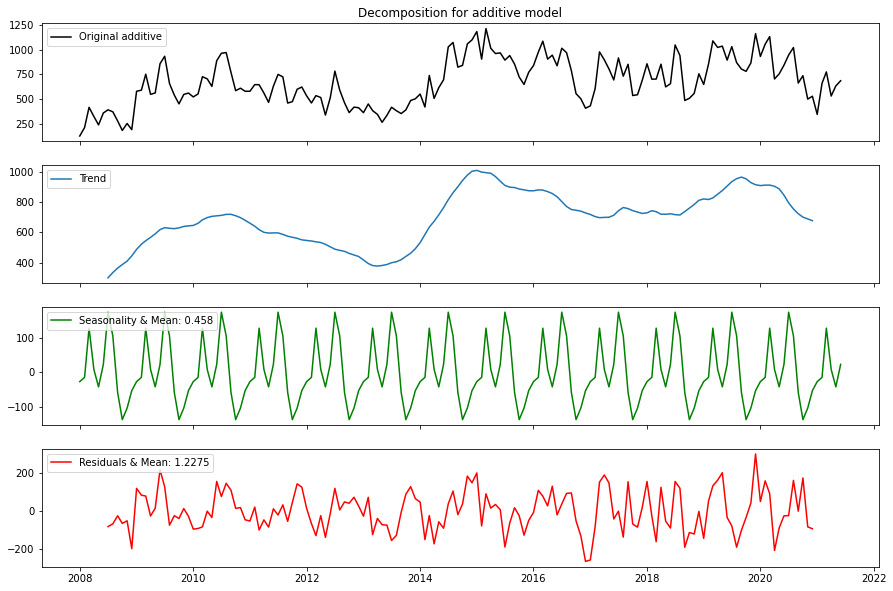

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.12520305259000125).


HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.12520305259000125).


In [20]:
y = im['Greece']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT GREECE SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**IRELAND**

In [21]:
y = im['Ireland']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.20762720668730084).


HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.20762720668730084).


*WE ACCEPT IRELAND SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SPAIN**

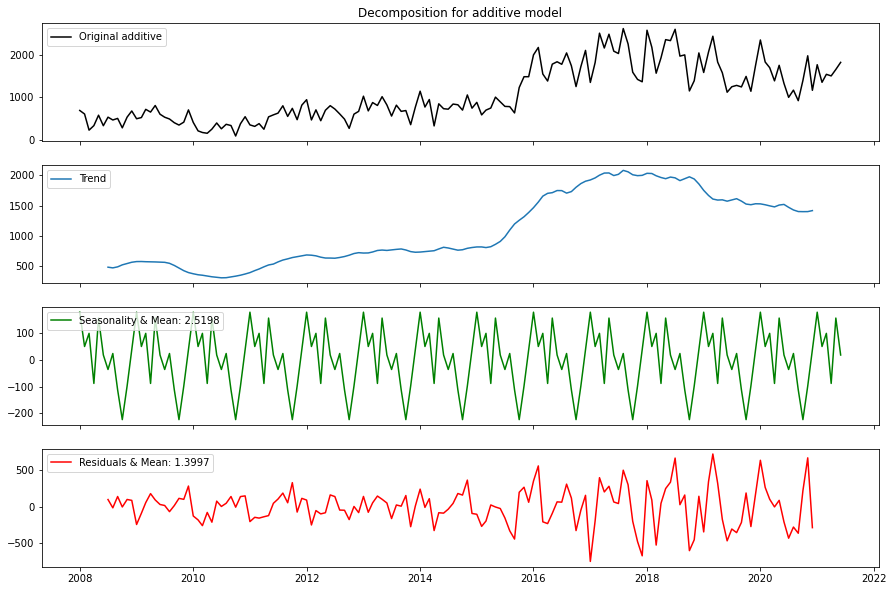

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.7380550727715018).


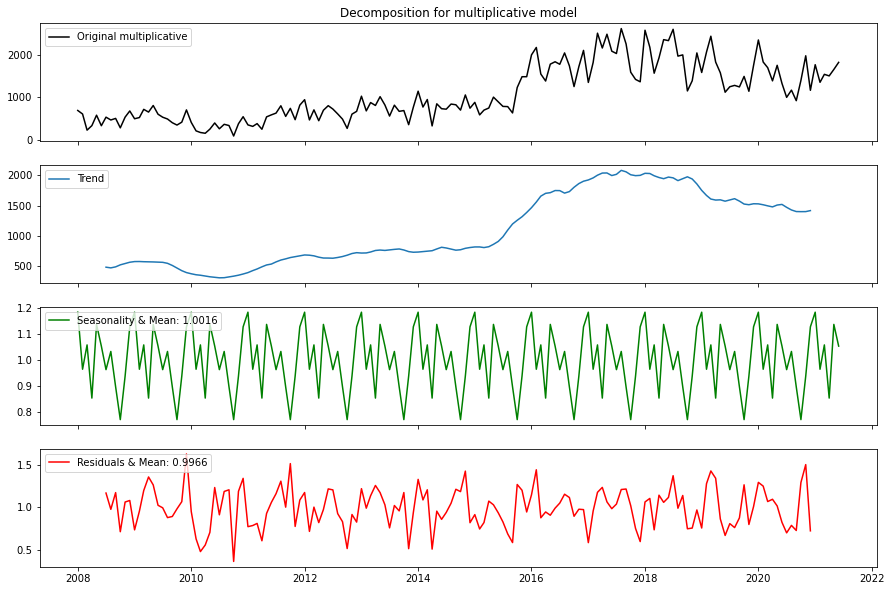

HO: Not Stationary.
H1: Stationary.
Result: Series is not Stationary (0.7380550727715018).


In [22]:
y = im['Spain']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SPAIN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**SWEDEN**

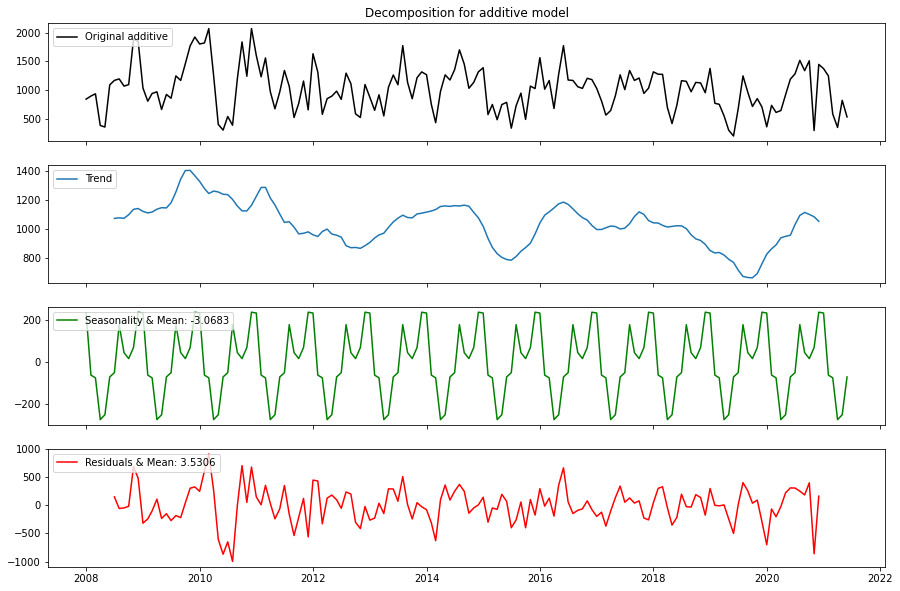

HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (2.9476182515635573e-10).


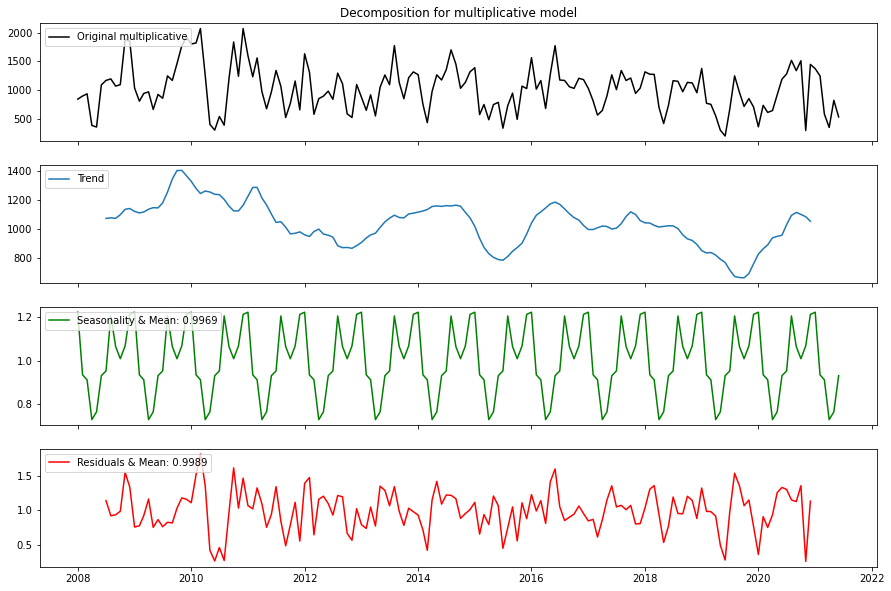

HO: Not Stationary.
H1: Stationary.
Result: Series is Stationary (2.9476182515635573e-10).


In [23]:
y = im['Sweden']
y.index.sort_values()

for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, True)

*WE ACCEPT SWEDEN SINCE IT'S NOT STATIONARY*

Residuals are scattered randomly around 0: the model is additive

**Finally, we'll continue with Denmark, Greece, Ireland, Spain and Sweden**